# Deteksi Outlier dengan K-Nearest Neighbors (KNN)

Outlier adalah data yang berbeda jauh dari pola umum dalam dataset. Penyebabnya bisa karena kesalahan pengukuran, input data yang salah, atau fenomena unik. Outlier bisa memengaruhi hasil analisis dan model machine learning, sehingga perlu dideteksi.

KNN bekerja dengan melihat kedekatan antar data. Dalam deteksi outlier, KNN mengukur jarak antara suatu titik dengan tetangga terdekatnya:

- Jika suatu titik hanya memiliki sedikit tetangga dalam radius tertentu, kemungkinan besar itu outlier.

- Jika jarak ke tetangga terdekat sangat besar, titik tersebut bisa dianggap sebagai outlier.

## Tahap Deteksi Outlier dengan KNN

1. Menghitung Jarak Antar Titik

- Menggunakan metrik jarak seperti Euclidean, Manhattan, atau Minkowski untuk mengukur kedekatan antar data.

2. Menentukan Nilai K (Jumlah Tetangga Terdekat)

- K terlalu kecil: terlalu sensitif terhadap noise.

- K terlalu besar: kurang akurat dalam mendeteksi outlier.

3. Menentukan Skor Outlier

- K-Nearest Neighbor Distance: Jika jarak ke K tetangga terlalu besar, kemungkinan outlier.

- Local Outlier Factor (LOF): Membandingkan kepadatan suatu titik dengan tetangganya. Jika kepadatannya lebih rendah, kemungkinan outlier.

- Distance-Based Outlier Score: Jika jumlah tetangga dalam radius tertentu sangat sedikit, bisa dianggap outlier.

## Kelebihan 

✔ Sederhana dan mudah dipahami.

✔ Tidak bergantung pada distribusi data.

✔ Bisa digunakan untuk data berdimensi tinggi.

## Kekurangan

✖ Lambat untuk dataset besar karena harus menghitung banyak jarak.

✖ Sensitif terhadap pemilihan nilai K.

## Kesimpulan

KNN bisa digunakan untuk mendeteksi outlier dengan menganalisis jarak antara titik data dan tetangganya. Metode seperti K-Nearest Neighbor Distance dan LOF membantu mengidentifikasi data yang berbeda jauh dari pola umum. Pemilihan K dan metrik jarak yang tepat sangat penting untuk akurasi deteksi outlier.

 id           Class  petal length  petal width  sepal length  sepal width  distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5  4.140048    False
  2     Iris-setosa           1.4          0.2           4.9          3.0  4.153312    False
  3     Iris-setosa           1.3          0.2           4.7          3.2  4.298837     True
  4     Iris-setosa           1.5          0.2           4.6          3.1  4.149699    False
  5     Iris-setosa           1.4          0.2           5.0          3.6  4.173727    False
  6     Iris-setosa           1.7          0.4           5.4          3.9  3.818377    False
  7     Iris-setosa           1.4          0.3           4.6          3.4  4.217819    False
  8     Iris-setosa           1.5          0.2           5.0          3.4  4.060788    False
  9     Iris-setosa           1.4          0.2           4.4          2.9  4.302325     True
 10     Iris-setosa           1.5          0.1           4.9          

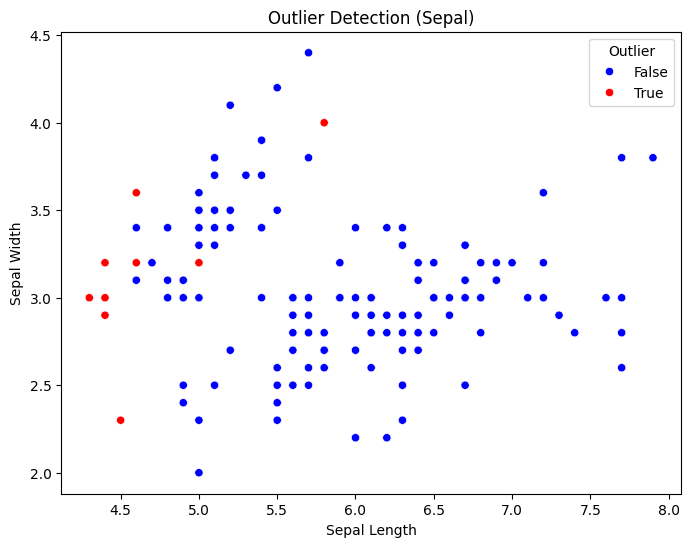

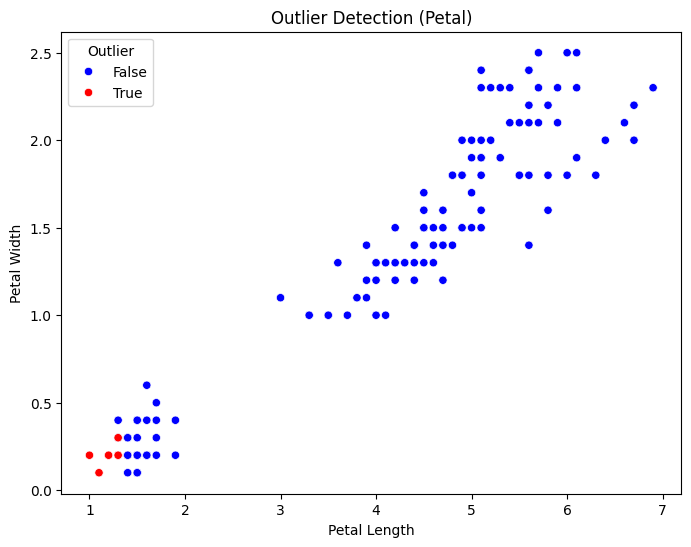

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean

# Load kedua file CSV
df_mysql = pd.read_csv("mysql.csv")
df_postgres = pd.read_csv("postgres.csv")

# Gabungkan berdasarkan 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgres, on=['id', 'Class'], how='inner')

# Pilih fitur yang digunakan untuk perhitungan jarak
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir
reference_point = data_values[-1]

# Fungsi untuk menghitung jarak Euclidean ke referensi
def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-93.5
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot untuk Sepal
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal length"], y=df_merged["sepal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title="Outlier")
plt.show()

# Visualisasi scatter plot untuk Petal
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal length"], y=df_merged["petal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Outlier")
plt.show()

In [2]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 10


In [3]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           Class  petal length  petal width  sepal length  sepal width  distance  outlier
150  Iris-virginica           5.1          1.8           5.9          3.0  0.000000    False
128  Iris-virginica           4.9          1.8           6.1          3.0  0.282843    False
139  Iris-virginica           4.8          1.8           6.0          3.0  0.316228    False
102  Iris-virginica           5.1          1.9           5.8          2.7  0.331662    False
143  Iris-virginica           5.1          1.9           5.8          2.7  0.331662    False
 71 Iris-versicolor           4.8          1.8           5.9          3.2  0.360555    False
 84 Iris-versicolor           5.1          1.6           6.0          2.7  0.374166    False
122  Iris-virginica           4.9          2.0           5.6          2.8  0.458258    False
127  Iris-virginica           4.8          1.8           6.2          2.8  0.469042    False
124  Iris-virginica           4.9          1.8           6.3          